LOCO, AT version


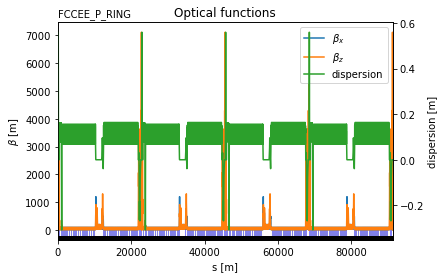

Execution time loading lattice: 15.667792320251465 sec


In [1]:
print(f"LOCO, AT version")
from at import *
from pylab import *
from at.load import load_mat
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
from random import random
from copy import copy
from copy import deepcopy
from at import elements
from at_modules_loco import *
#ring=at.Lattice(ring1, energy=1)

t0 = time.time()

ring = at.load_mat('fccee_t_v22_b_c.mat', key='ring')
ring.radiation_off()
ring.plot_beta()

t1 = time.time()
print(f"Execution time loading lattice: {t1-t0} sec")

In [2]:
t0_fullCode = time.time()

In [3]:
#Turn sextuplets off
sext_indexes = get_refpts(ring,at.elements.Sextupole)
for i in sext_indexes:
    ring[i].H=ring[i].H*0

In [4]:
t0 = time.time()

quad_indexes = get_refpts(ring, elements.Quadrupole)
quad_strengths_before =[]
for i in quad_indexes:
    quad_strengths = ring[i].K
    quad_strengths_before.append(quad_strengths)
    i +=1


t1 = time.time()
print(f"Execution time chose correctors: {t1-t0} sec")

Execution time chose correctors: 0.022903919219970703 sec


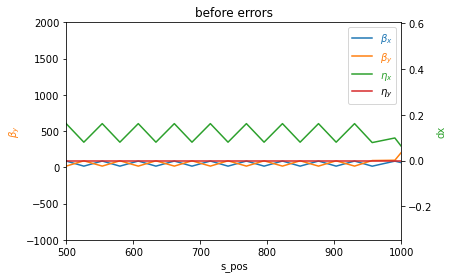

In [5]:
BPMs_random_noise = 0.0
twiss = getOptics(ring, at.elements.Monitor, BPMs_random_noise )
make_plot_all(twiss, 'before errors', 'before_errors', 500, 1000, -1000, 2000)

In [6]:
t0 = time.time()
print("Choose Used correctors")
correctors_indexes = get_refpts(ring, elements.Corrector)
print("Total number of Correctors: ", len(correctors_indexes))
correctors_names = []
i=0
while(i<len(correctors_indexes)):
    correctors_names.append(ring[correctors_indexes[i]].FamName)
    i += 1

used_correctors = used_cor(831, correctors_names)

t1 = time.time()
print(f"Execution time chose correctors: {t1-t0} sec")

Choose Used correctors
Total number of Correctors:  3324
Execution time chose correctors: 0.008629560470581055 sec


In [7]:
used_correctors

['CXY4', 'CXY5286', 'CXY10568', 'CXY15850']

In [8]:
print("Choose Used Quadrpoles Families")

Choose Used Quadrpoles Families


QF
IP0, IP1: 8 QFG2, 179 QF2, 173 QF4
IP2, IP3: 8 QFG2, 179 QF2, 173 QF4
IP4, IP5: 8 QFG2, 179 QF2, 173 QF4
IP6, IP7: 8 QFG2, 179 QF2, 173 QF4
QD
IP0, IP1: 8 QDG1, 179 QD1, 173 QD3
IP2, IP3: 8 QDG1, 179 QD1, 173 QD3
IP4, IP5: 8 QDG1, 179 QD1, 173 QD3
IP6, IP7: 8 QDG1, 179 QD1, 173 QD3

In [9]:
t0 = time.time()
qf_indexes = get_refpts(ring,'QF*')
qd_indexes = get_refpts(ring,'QD*')
qfg_indexes = get_refpts(ring,'QFG*')
qdg_indexes = get_refpts(ring,'QDG*')
qf2_indexes = get_refpts(ring,'QF2*')
qd1_indexes = get_refpts(ring,'QD1*')
qf4_indexes = get_refpts(ring,'QF4*')
qd3_indexes = get_refpts(ring,'QD3*')
print("# of QDG1:", len(qdg_indexes), '# of QFG2:', len(qfg_indexes), '# of QD1:', len(qd1_indexes), '# of QF2:', len(qf2_indexes), '# of QD3:', len(qd3_indexes), '# of QF4:', len(qf4_indexes))

# all_quads_names
quad_info_ = quad_info(ring)
quad_dict, quad_vals = getQuadFamilies(quad_info_)
all_quads_names = [k for k in quad_dict.keys()]

# choosing the used Quads families
qdg1_names =[]
qfg2_names =[]
qd1_names= []
qf2_names = []
qd3_names = []
qf4_names = []
used_quadrpoles_families = ['qd1', 'qf2', 'qd3', 'qf4'] # did not choose from 'qdg', 'qfg',
for i in all_quads_names:
    if i.startswith('qdg'):
       qdg1_names.append(i)
    if i.startswith('qfg'):
       qfg2_names.append(i)
    if i.startswith('qd1'):
       qd1_names.append(i)
    if i.startswith('qf2'):
       qf2_names.append(i)
    if i.startswith('qd3'):
       qd3_names.append(i)
    if i.startswith('qf4'):
       qf4_names.append(i)
used_qf4 = [qf4_names[x:x+28] for x in range(0, len(qf4_names), 28)] #720
used_qd1 = [qd1_names[x:x+28] for x in range(0, len(qd1_names), 28)]
used_qf2 = [qf2_names[x:x+28] for x in range(0, len(qf2_names), 28)]
used_qd3 = [qd3_names[x:x+28] for x in range(0, len(qd3_names), 28)]


used_qf4_ind = [qf4_indexes[x:x+28] for x in range(0, len(qf4_indexes), 28)]
used_qd1_ind = [qd1_indexes[x:x+28] for x in range(0, len(qd1_indexes), 28)]
used_qf2_ind = [qf2_indexes[x:x+28] for x in range(0, len(qf2_indexes), 28)]
used_qd3_ind = [qd3_indexes[x:x+28] for x in range(0, len(qd3_indexes), 28)]

print(len(used_qf4))
used_quadrpoles_families = used_qd1+used_qf2+used_qd3+used_qf4
used_quadrpoles_families_ind = used_qd1_ind+used_qf2_ind+used_qd3_ind+used_qf4_ind
print(len(used_quadrpoles_families))
print(len(used_quadrpoles_families_ind))

t1 = time.time()
print(f"Execution time chose quadrpoles: {t1-t0} sec")

# of QDG1: 36 # of QFG2: 40 # of QD1: 720 # of QF2: 720 # of QD3: 700 # of QF4: 696
25
102
102
Execution time chose quadrpoles: 0.7594969272613525 sec


In [10]:
used_quadrpoles_families_ind

[array([3252, 3268, 3280, 3300, 3312, 3328, 3344, 3356, 3376, 3388, 3404,
        3420, 3432, 3452, 3464, 3480, 3496, 3508, 3528, 3540, 3556, 3572,
        3584, 3604, 3616, 3632, 3648, 3660], dtype=uint32),
 array([3680, 3692, 3708, 3724, 3736, 3756, 3768, 3784, 3800, 3812, 3832,
        3844, 3860, 3876, 3888, 3908, 3920, 3936, 3952, 3964, 3984, 3996,
        4012, 4028, 4040, 4060, 4072, 4088], dtype=uint32),
 array([4104, 4116, 4136, 4148, 4164, 4180, 4192, 4212, 4224, 4240, 4256,
        4268, 4288, 4300, 4316, 4332, 4344, 4364, 4376, 4392, 4408, 4420,
        4440, 4452, 4468, 4484, 4496, 4516], dtype=uint32),
 array([4528, 4544, 4560, 4572, 4592, 4604, 4620, 4636, 4648, 4668, 4680,
        4696, 4712, 4724, 4744, 4756, 4772, 4788, 4800, 4820, 4832, 4848,
        4864, 4876, 4896, 4908, 4924, 4940], dtype=uint32),
 array([4952, 4972, 4984, 5000, 5016, 5028, 5048, 5060, 5076, 5092, 5104,
        5124, 5136, 5152, 5168, 5180, 5200, 5212, 5228, 5244, 5256, 5276,
        5288, 5304, 

Execution time ORMs: 13.560580015182495 sec
(4, 3324)


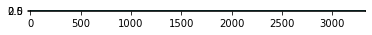

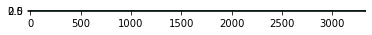

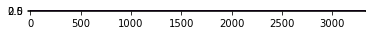

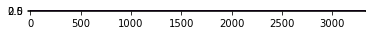

In [11]:
t0 = time.time()
Cxx, Cxy= ORM_x(1.e-6, ring, BPMs_random_noise,used_correctors)
Cyy, Cyx= ORM_y(1.e-6, ring, BPMs_random_noise, used_correctors)
t1 = time.time()
print(f"Execution time ORMs: {t1-t0} sec")
print(shape(Cxx))
plotORM(Cxx, 'Cxx')
plotORM(Cyy, 'Cyy')
plotORM(Cyx, 'Cyx')
plotORM(Cxy, 'Cxy')

In [12]:
Cxx

array([[  5.92559008,  10.67355446,  18.20502303, ...,  -3.78848205,
         -1.64555929,  -0.62834542],
       [ -7.29665109, -11.91315529, -19.64005857, ...,   8.03261784,
          4.25046816,   2.61990572],
       [  7.77314407,  13.08678701,  21.81596529, ..., -11.29195623,
         -6.33427046,  -4.29026608],
       [ -7.29665108, -12.65598116, -21.31723885, ...,  13.16690296,
          7.64149241,   5.43464064]])

In [13]:
Cyy

array([[ 1157.51687949,  1387.41600522,  1266.84243712, ...,
        -1389.49241788, -1178.44927429,  -905.53714466],
       [-2294.59787927, -2748.70604255, -2508.46091589, ...,
         2758.0296234 ,  2339.86053532,  1798.50618474],
       [ 2717.50006533,  3255.74625101,  2971.55728384, ...,
        -3268.14786912, -2773.00527238, -2131.70175639],
       [-2294.59786633, -2749.45641731, -2509.77559449, ...,
         2761.07614893,  2343.06998632,  1801.41889203]])

In [14]:
dk =1.e-06

t0 = time.time()

C0x, C0y, C0xy, C0yx, dCx, dCy, dCxy,dCyx  = generatingQuadsResponse(ring, dk, Cxx, Cyy,Cxy, Cyx,BPMs_random_noise, used_quadrpoles_families_ind, CfamilyNames= used_correctors)

t1 = time.time()
print(f"Execution time generatingQuadsResponse: {t1-t0} sec")

generating response to family  1
Execution time: 13.695167541503906 sec
generating response to family  2
Execution time: 13.729952335357666 sec
generating response to family  3
Execution time: 13.499667644500732 sec
generating response to family  4
Execution time: 13.692734003067017 sec
generating response to family  5
Execution time: 13.892683029174805 sec
generating response to family  6
Execution time: 13.472143173217773 sec
generating response to family  7
Execution time: 13.468084573745728 sec
generating response to family  8
Execution time: 13.499131917953491 sec
generating response to family  9
Execution time: 13.405761003494263 sec
generating response to family  10
Execution time: 13.508269786834717 sec
generating response to family  11
Execution time: 17.583285331726074 sec
generating response to family  12
Execution time: 15.235670328140259 sec
generating response to family  13
Execution time: 17.57991671562195 sec
generating response to family  14
Execution time: 17.01574444

In [15]:

t0 = time.time()
gradErr = 2.e-3
simulateFixedGradientErrors(ring, gradErr, used_quadrpoles_families_ind)

t1 = time.time()
print(f"Execution time simulte erros: {t1-t0} sec")

Execution time simulte erros: 0.009006500244140625 sec


Text(0, 0.5, '$\\Delta K[m^-2]$')

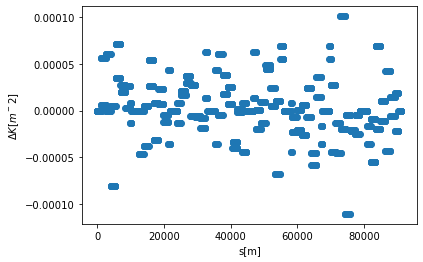

In [16]:
quad_indexes = get_refpts(ring, elements.Quadrupole)
elements_indexes = get_refpts(ring, '*')
opt = at.linopt(ring, refpts=quad_indexes, get_chrom=True)
s_pos_q = opt[3].s_pos
quad_strengths_after =[]
for i in quad_indexes:
    quad_strengths = ring[i].K
    quad_strengths_after.append(quad_strengths)

plt.scatter(s_pos_q, np.array(quad_strengths_before)- np.array(quad_strengths_after))
plt.xlabel("s[m]")
plt.ylabel("$\Delta K[m^-2]$")
#plt.xlim(0, 22793)

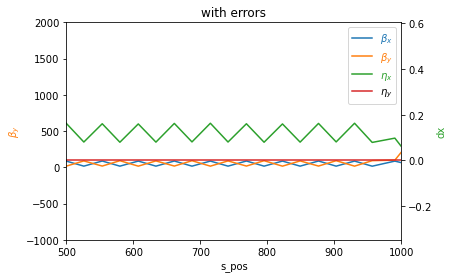

In [17]:
twiss_err = getOptics(ring, at.elements.Monitor, BPMs_random_noise ) #####
make_plot_all(twiss_err, 'with errors', 'with_errors', 500, 1000, -1000, 2000)

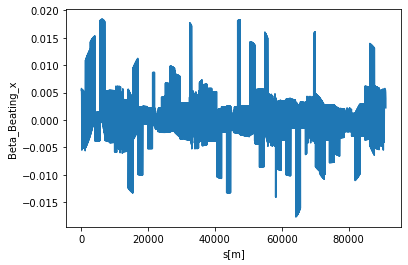

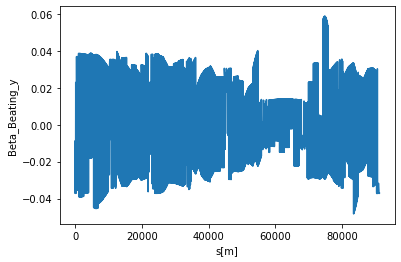

RMS beta beat, x:0.4875689919949055%   y: 2.3210525008427902%
STD beta beat, x:0.4868201056051379%   y: 2.3209345368198813%


In [18]:
bx_rms1, by_rms1 = getBetaBeat(twiss, twiss_err,'dp_x_err' , 'db_y_err')

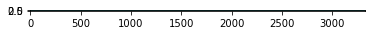

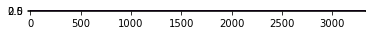

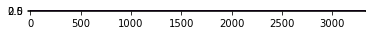

In [19]:
Cxx1, Cxy1= ORM_x(1.e-6, ring, BPMs_random_noise, used_correctors)
Cyy1, Cyx1= ORM_y(1.e-6, ring, BPMs_random_noise, used_correctors)

plotORM(Cxx1, 'Cxx')
plotORM(Cxy1, 'Cxy')
plotORM(Cyx1, 'Cyx')

iteration0:
Execution time ORMS functions: 15.683781623840332 sec
Execution time define matrices function: 1.034034013748169 sec
Execution time get inverse: 0.004863262176513672 sec
Execution time set correction: 0.011049747467041016 sec
Execution time getOptics: 3.129347324371338 sec
beta beating with errors


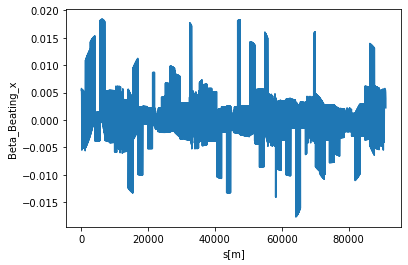

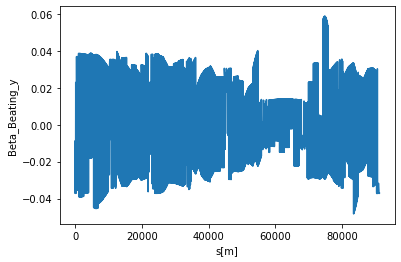

RMS beta beat, x:0.4875689919949055%   y: 2.3210525008427902%
STD beta beat, x:0.4868201056051379%   y: 2.3209345368198813%
beta beating after corrections


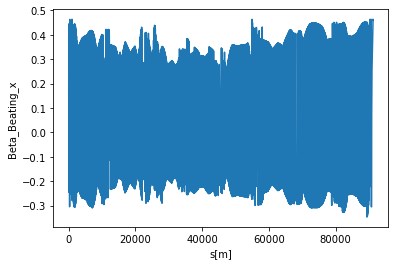

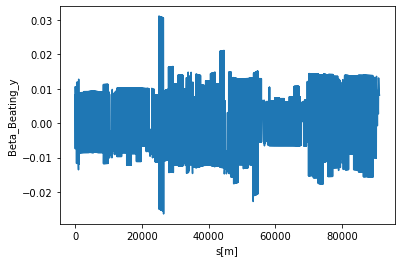

RMS beta beat, x:25.51835690128034%   y: 0.9531086464912097%
STD beta beat, x:24.858094308980235%   y: 0.9531067733247139%
betax_correction reduction -5133.794051765083
betax_correction reduction 58.936359856352695
iteration1:
Execution time ORMS functions: 16.55951428413391 sec
Execution time define matrices function: 1.303464651107788 sec
Execution time get inverse: 0.005552530288696289 sec
Execution time set correction: 0.015744447708129883 sec
Execution time getOptics: 3.830854892730713 sec
beta beating with errors


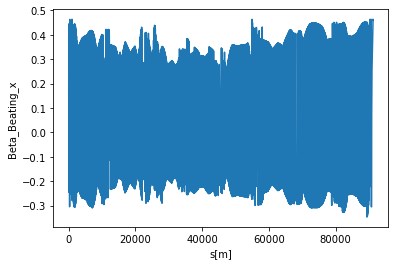

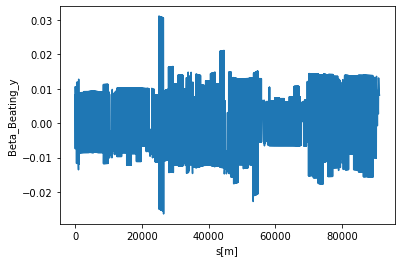

RMS beta beat, x:25.51835690128034%   y: 0.9531086464912097%
STD beta beat, x:24.858094308980235%   y: 0.9531067733247139%
beta beating after corrections


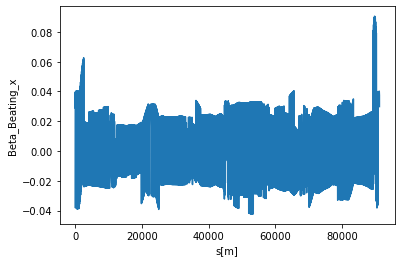

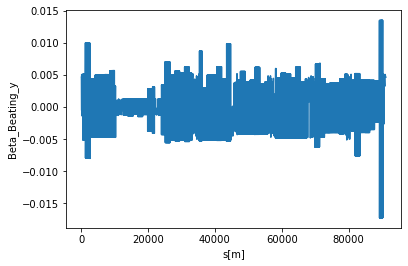

RMS beta beat, x:2.167198355455412%   y: 0.3793565517256644%
STD beta beat, x:2.1644223983030484%   y: 0.37924771428904464%
betax_correction reduction 91.5072966341862
betax_correction reduction 60.19797395373192
iteration2:
Execution time ORMS functions: 17.040602684020996 sec
Execution time define matrices function: 1.3128061294555664 sec
Execution time get inverse: 0.005159854888916016 sec
Execution time set correction: 0.011967182159423828 sec
Execution time getOptics: 3.8320305347442627 sec
beta beating with errors


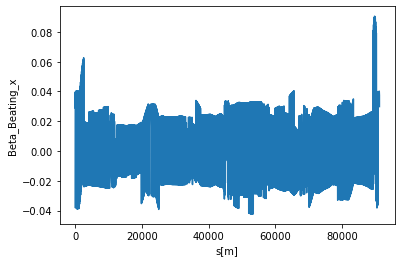

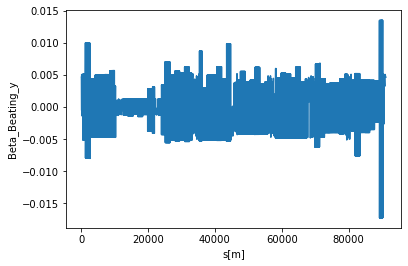

RMS beta beat, x:2.167198355455412%   y: 0.3793565517256644%
STD beta beat, x:2.1644223983030484%   y: 0.37924771428904464%
beta beating after corrections


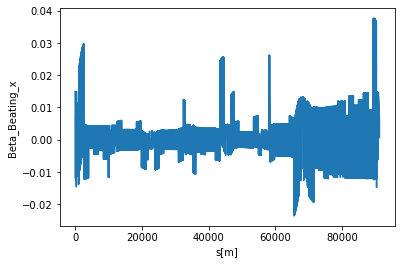

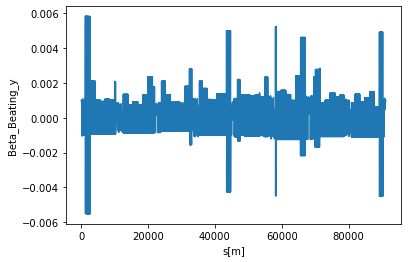

RMS beta beat, x:0.6847981228990413%   y: 0.12352111205678393%
STD beta beat, x:0.6841943732240641%   y: 0.12343100015369979%
betax_correction reduction 68.40168685181848
betax_correction reduction 67.43930966925556
iteration3:
Execution time ORMS functions: 16.267770290374756 sec
Execution time define matrices function: 1.3148612976074219 sec
Execution time get inverse: 0.004990100860595703 sec
Execution time set correction: 0.017075300216674805 sec
Execution time getOptics: 3.951303005218506 sec
beta beating with errors


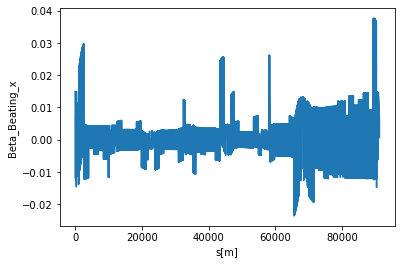

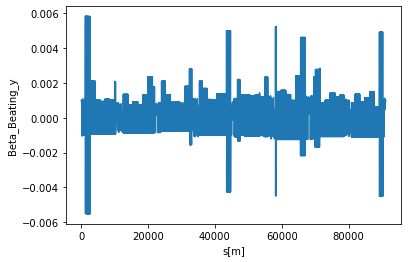

RMS beta beat, x:0.6847981228990413%   y: 0.12352111205678393%
STD beta beat, x:0.6841943732240641%   y: 0.12343100015369979%
beta beating after corrections


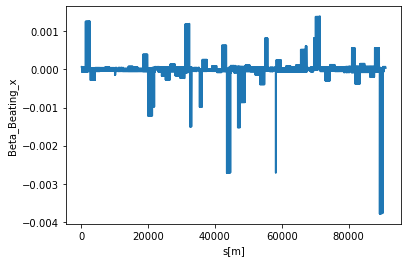

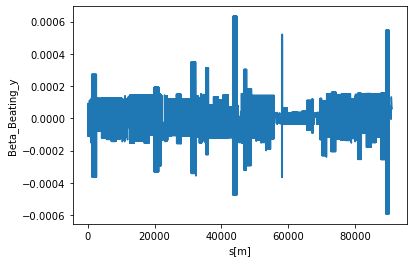

RMS beta beat, x:0.03654336374385607%   y: 0.013432395777397865%
STD beta beat, x:0.03651925892665616%   y: 0.013431346301582547%
betax_correction reduction 94.66362968561414
betax_correction reduction 89.12542515709958
iteration4:
Execution time ORMS functions: 16.504769802093506 sec
Execution time define matrices function: 1.3953402042388916 sec
Execution time get inverse: 0.00557255744934082 sec
Execution time set correction: 0.016021013259887695 sec
Execution time getOptics: 3.592219591140747 sec
beta beating with errors


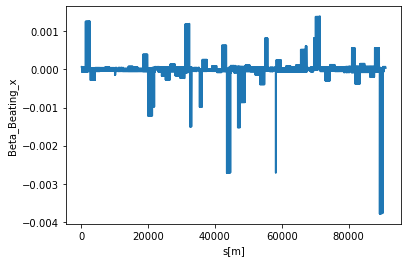

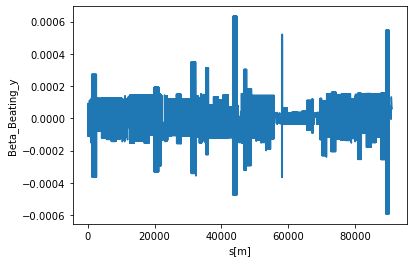

RMS beta beat, x:0.03654336374385607%   y: 0.013432395777397865%
STD beta beat, x:0.03651925892665616%   y: 0.013431346301582547%
beta beating after corrections


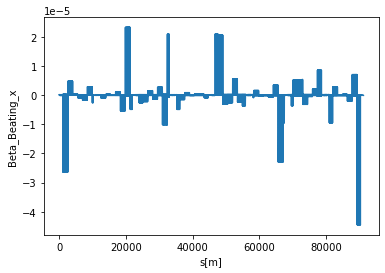

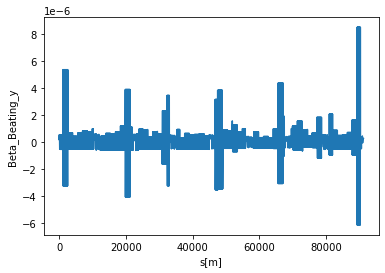

RMS beta beat, x:0.00044181233711449114%   y: 0.00011192963603225463%
STD beta beat, x:0.00044171134913059587%   y: 0.00011189090255033863%
betax_correction reduction 98.79099160052344
betax_correction reduction 99.16671874558227


In [20]:
numberOfIteration = 5
for x in range(numberOfIteration):
    print('iteration'+str(x) +':')
    twiss_error0 = getOptics(ring, at.elements.Monitor, BPMs_random_noise)

    t0 = time.time()
    Cxx1, Cxy1= ORM_x(1.e-6, ring, BPMs_random_noise, used_correctors)
    Cyy1, Cyx1= ORM_y(1.e-6, ring, BPMs_random_noise, used_correctors)
    t1 = time.time()
    print(f"Execution time ORMS functions: {t1-t0} sec")

    t0 = time.time()
    A, B = defineMatrices(C0x, C0y, C0xy, C0yx, Cxx1, Cyy1, Cxy1, Cyx1, dCx, dCy, dCxy,dCyx)
    t1 = time.time()
    print(f"Execution time define matrices function: {t1-t0} sec")
    dk = len(dCx)
    cut = 102
    t0 = time.time()
    Ai, r, e = getInverse(A, B,dk, cut)
    t1 = time.time()
    print(f"Execution time get inverse: {t1-t0} sec")
    #print("r................", r)
    t0 = time.time()
    setCorrection(ring, r , used_quadrpoles_families_ind, used_quadrpoles_families)
    t1 = time.time()
    print(f"Execution time set correction: {t1-t0} sec")
    t0 = time.time()
    twiss_corrected = getOptics(ring, at.elements.Monitor, BPMs_random_noise)
    t1 = time.time()
    print(f"Execution time getOptics: {t1-t0} sec")

    print('beta beating with errors')
    bx_rms1, by_rms1 = getBetaBeat(twiss, twiss_error0,'dp_x_err' , 'db_y_err')
    print('beta beating after corrections')
    bx_rms2, by_rms2= getBetaBeat(twiss, twiss_corrected, 'dp_x_corrected' , 'db_y_corrected')
    print('betax_correction reduction', (1-bx_rms2/bx_rms1)*100)
    print('betax_correction reduction', (1-by_rms2/by_rms1)*100)
    #Cxx2, Cxy2= ORM_x(1.e-6, ring, BPMs_random_noise, CfamilyNames = used_correctors)
    #Cyy2, Cyx2= ORM_y(1.e-6, ring, BPMs_random_noise, CfamilyNames = used_correctors)


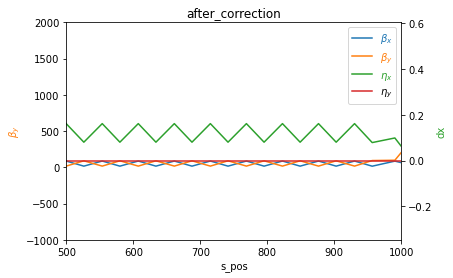

In [21]:
twiss_err = getOptics(ring, at.elements.Monitor, BPMs_random_noise ) #####
make_plot_all(twiss_err, 'after_correction', 'after_correction', 500, 1000, -1000, 2000)

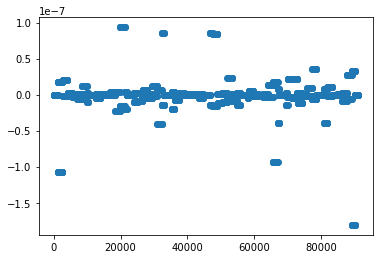

In [23]:
quad_indexes = get_refpts(ring, elements.Quadrupole)
elements_indexes = get_refpts(ring, '*')
opt = at.linopt(ring, refpts=quad_indexes, get_chrom=True)
s_pos_q = opt[3].s_pos
quad_strengths_after =[]
for i in quad_indexes:
    quad_strengths = ring[i].K
    quad_strengths_after.append(quad_strengths)

plt.scatter(s_pos_q, np.array(quad_strengths_before)- np.array(quad_strengths_after))

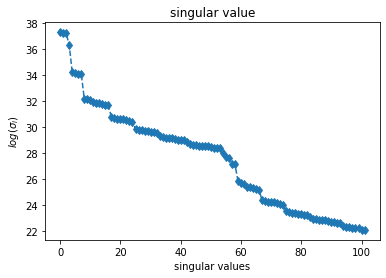

In [24]:
u, s, v = np.linalg.svd(A, full_matrices=True)
plt.plot(np.log(s), 'd--')
plt.title('singular value')
plt.xlabel("singular values")
plt.ylabel("$log(\sigma_i)$")

plt.show()

In [25]:
t1_fullCode = time.time()
print(f"Execution time: {t1_fullCode-t0_fullCode} sec")

Execution time: 2439.9829807281494 sec
